**Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset via Keras Api**

In [ ]:
df= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Splitting dataset into train and test**

In [ ]:
(X_train,y_train),(X_test,y_test)=df

##**Exploratory data analysis**

In [ ]:
print("Shape of each image in pixels",X_train[0].shape)

Shape of each image in pixels (28, 28)


In [ ]:
label=pd.Series(y_train) 

**Displaying digits from MNIST dataset**

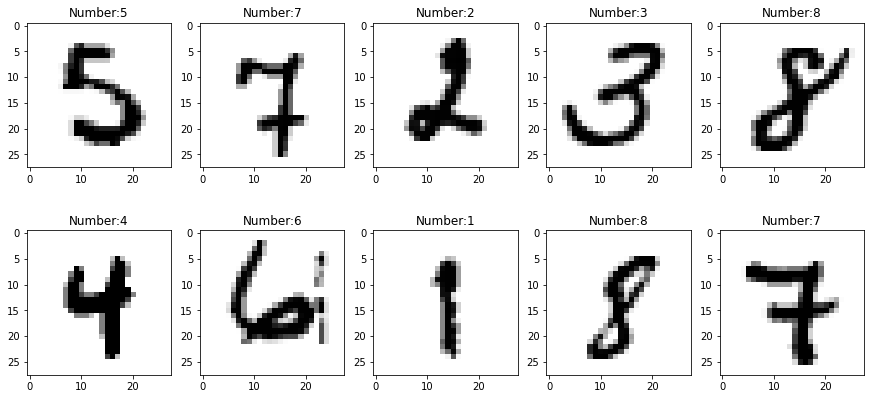

In [ ]:
import random
fig,ax=plt.subplots(2,5,figsize=(15,7))
ax=ax.flatten()
for i in range(10):
    z=random.randint(0,60000)
    show=X_train[z].reshape(28,28)
    ax[i].imshow(show,cmap='binary')
    ax[i].set(title=f"Number:{y_train[z]}");

**Total number of each digit**

In [ ]:
k=label.value_counts().sort_index()
df_new=pd.DataFrame(k,columns=['Number of Digits'])
df_new

,Number of Digits
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


**Barplot showing the number of each digit**

Text(0, 0.5, 'Number of Digits in dataset')

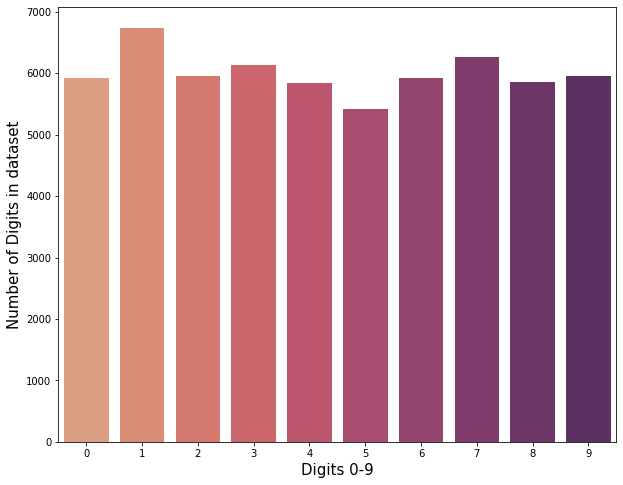

In [ ]:
# Print data histogram
plt.figure(figsize=(10,8))
a=sns.countplot(y_train,palette="flare");
a.set_xlabel("Digits 0-9",fontsize=15)
a.set_ylabel("Number of Digits in dataset",fontsize=15)

**Pie plot**

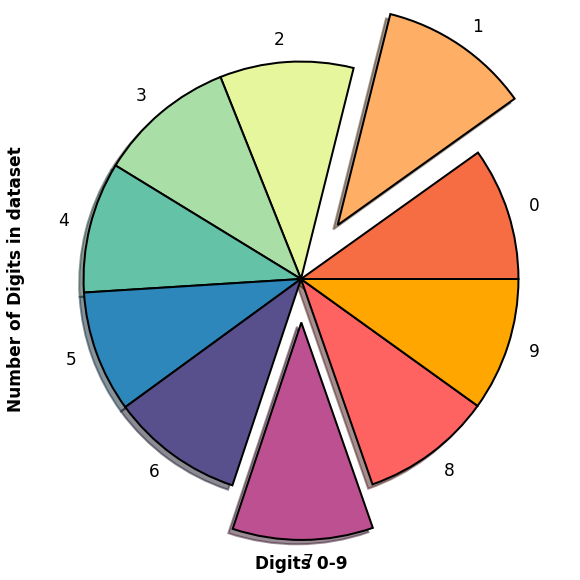

In [ ]:
explode = (0, 0.3,0,0,0,0,0,0.2,0,0)
colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB', '#58508D','#BC5090', '#FF6361', '#FFA600', ]
k.plot(kind='pie',figsize=(30,10),fontsize=17, colors=colors,explode=explode,shadow=True, wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.xlabel("Digits 0-9",fontsize=17, weight='bold')
plt.ylabel("Number of Digits in dataset",fontsize=17,weight='bold')
plt.show()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Number of Digits  10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


#**Structure of a Convolutional Neural Network**


#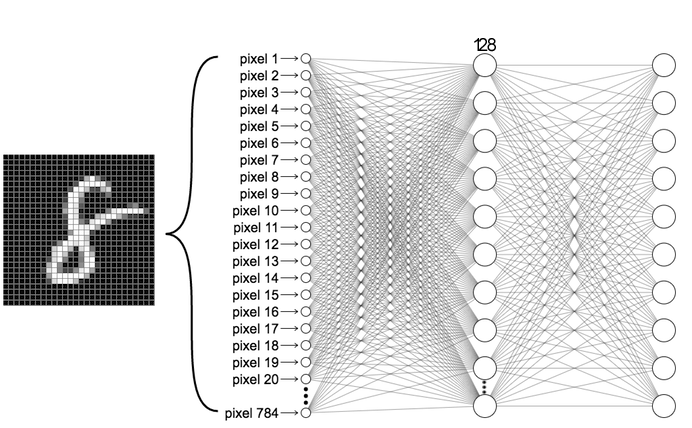

#Preprocessing the data

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
#Normalizing the data so that all the pixels in image are on same scale 
X_train=X_train/255.0
X_test=X_test/255.0
#The value of data in each pixel is between 0 and 1 after normalizing

#Building a **CNN**

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model=tf.keras.models.Sequential([
  #1st Layer
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),#MaxPooling function calculates the maximum value in each patch of each feature map.
  BatchNormalization(axis=-1),#Normalize the inputs of the layer.
  #2nd layer
  tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(axis=-1),
  #Flattening the layers
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  #Dense Layer
  tf.keras.layers.Dense(128,activation='relu'),
  BatchNormalization(axis=-1),
  #Output Layer
  tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()#Showing the model summary

##NOTEs for understanding working :-
#Relu function is a linear function that will output the input directly if it is positive else it will output zero.
#Using relu activation function in the hidden layers as it makes the model easier to train and often achieves better performance.

#Softmax function is a function in which the unit with the largest input has output +1 while all other units have output 0.
#Using softmax activation function in the output layer helps in predicting a multinomial probability distribution(0,1,2,3...9),multiclass classification.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0

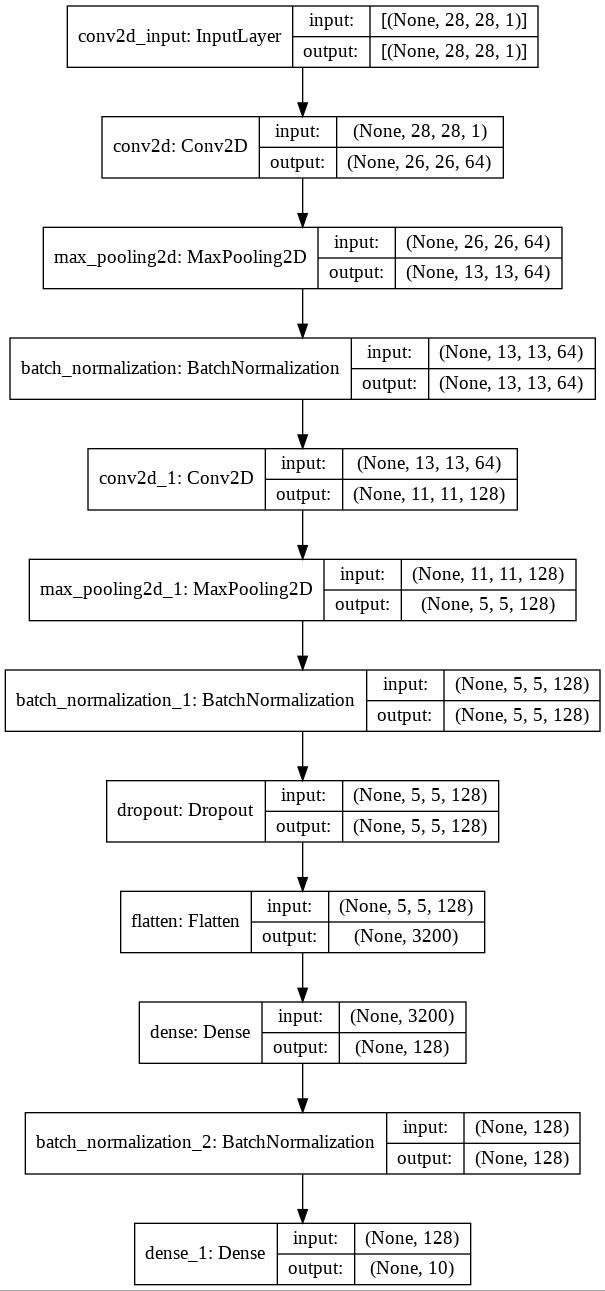

In [ ]:
plot_model(model,'model.jpg', show_shapes=True)

#Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
#x = model.fit (X_train, y_train , epochs= 10, batch_size = 128, verbose=2, validation_split=0.1)
x = model.fit (X_train, y_train , epochs= 15,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 43s 8ms/step - loss: 0.1210 - accuracy: 0.9624 - val_loss: 0.0482 - val_accuracy: 0.9863
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 3/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 4/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0346 - val_accuracy: 0.9915
Epoch 5/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0321 - val_accuracy: 0.9920
Epoch 6/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0300 - val_accuracy: 0.9917
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0267 - val_ac

#Printing the accuracy of model

In [ ]:
loss,acc=model.evaluate(X_train,y_train, verbose =0)
print("The train accuracy of model is :-",acc*100)

The train accuracy of model is :- 99.88333582878113


In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test,verbose =0)
print("The test accuracy of model is :-",test_acc*100)

The test accuracy of model is :- 99.3399977684021


#Plotting the accuracy and loss of model

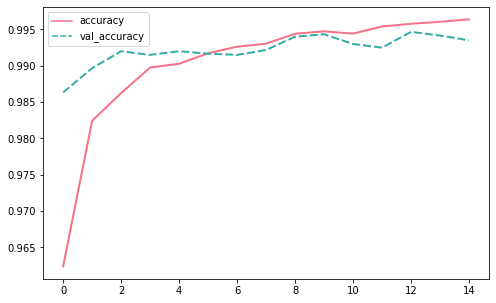

In [ ]:
data1=pd.DataFrame(x.history)
plt.figure(figsize = (8,5))
sns.lineplot(data=data1[['accuracy','val_accuracy']],palette='husl',linewidth=2);

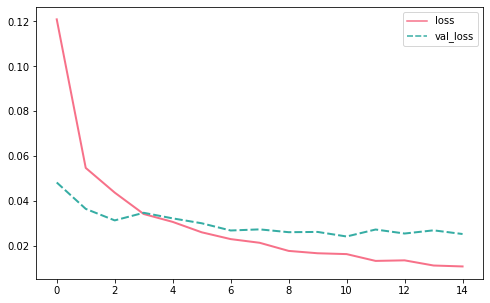

In [ ]:
#Loss
plt.figure(figsize = (8,5))
sns.lineplot(data=data1[['loss','val_loss']],palette='husl',linewidth=2);

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    1,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1131,    0,    1,    0,    0,    0,    2,    0,    1],
       [   0,    0, 1027,    0,    0,    0,    0,    4,    1,    0],
       [   0,    0,    1, 1004,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    0,    5],
       [   1,    0,    1,    5,    0,  882,    1,    0,    0,    2],
       [   3,    1,    0,    0,    2,    2,  949,    0,    1,    0],
       [   0,    0,    3,    0,    0,    0,    0, 1024,    0,    1],
       [   1,    0,    2,    0,    0,    0,    0,    0,  969,    2],
       [   0,    0,    0,    0,    5,    2,    0,    2,    2,  998]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

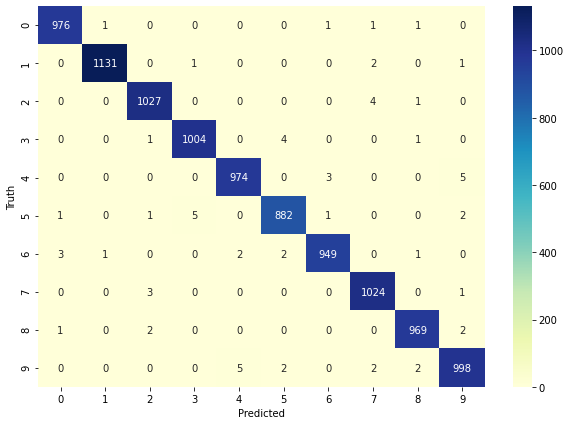

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**Predicting the digits**

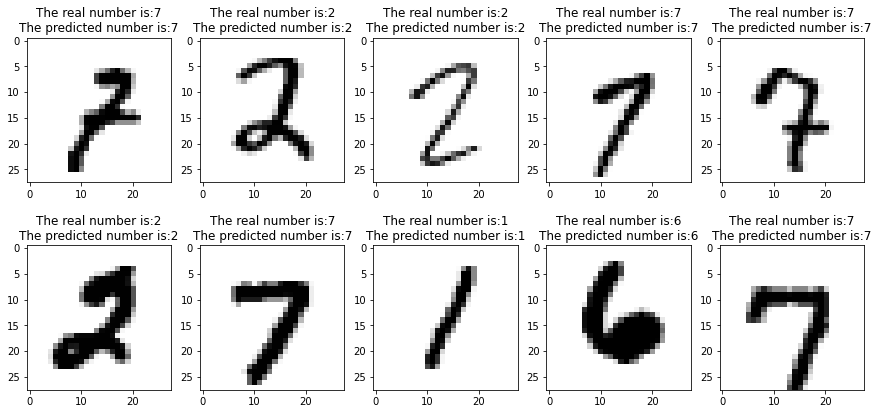

In [ ]:
y_pred=model.predict(X_test)
fig,ax=plt.subplots(2,5,figsize=(15,7))
ax=ax.flatten()
for i in range(10):
    z=random.randint(0,10000)
    show=X_test[z].reshape(28,28)
    ax[i].imshow(show,cmap='binary')
    ax[i].set(title=f"The real number is:{y_test[z]}\nThe predicted number is:{y_pred[z].argmax()}")


**A popular dataset called MNIST was taken to make predictions of handwritten digits from 0 to 9. The dataset was cleaned, scaled, and shaped. Using TensorFlow, a CNN model was created and was eventually trained on the training dataset. Finally, predictions were made using the trained model.
As seen from the output we trained our model in 15 epoch and got accuracy of 99.30% approximately.**